# Seattle Traffic Records Analysis

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## read data & check descriptives

In [29]:
df=pd.read_csv('data-Collisions.csv')

/Users/shibanaiyasufumi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
print(df.dtypes)
df.head()

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - both moving - sideswipe,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [31]:
print(df.shape)
df['SEVERITYCODE'].value_counts()

(194673, 38)


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### Missing Value Check

In [32]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [33]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [34]:
features=['ADDRTYPE','ROADCOND','WEATHER','LIGHTCOND','INATTENTIONIND', 'UNDERINFL', 'SPEEDING']

for i in features:
    print(df[i].value_counts(dropna=False))
    print('')

Block           126926
Intersection     65070
NaN               1926
Alley              751
Name: ADDRTYPE, dtype: int64

Dry               124510
Wet                47474
Unknown            15078
NaN                 5012
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
NaN                           5081
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
NaN      

### date to day_of_the_week (weekend)

In [35]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['DAYOFWEEK'] = df['INCDTTM'].dt.dayofweek
    
df['DAYOFWEEK'].value_counts()

df['WEEKEND']= df['DAYOFWEEK'].apply(lambda x: 1 if (x>3)  else 0)
print(df['WEEKEND'].value_counts())

0    112996
1     81677
Name: WEEKEND, dtype: int64


### Data cleaning

In [36]:
df['SEVERITY']=df['SEVERITYCODE']
df['SEVERITY'].replace({2:'1 injury',1:'0 property'},inplace=True )

In [37]:
df['ADDINT']= df['ADDRTYPE'].apply(lambda x: 1 if (x =='Intersection')  else 0)
df['WEACLE']= df['WEATHER'].apply(lambda x: 1 if (x =='Clear')  else 0)
df['ROADRY']= df['ROADCOND'].apply(lambda x: 1 if (x =='Dry')  else 0)
df['LIGDAY']= df['LIGHTCOND'].apply(lambda x: 1 if (x =='Daylight')  else 0)

df['INATTE']=df['INATTENTIONIND'].apply(lambda x: 1 if (x =='Y')  else 0)
df['UNDERI']=df['UNDERINFL'].apply(lambda x: 1 if (x =='Y' or x=='0')  else 0)
df['SPEEDI']=df['SPEEDING'].apply(lambda x: 1 if (x =='Y')  else 0)


### Basic 2-var barplots

In [38]:
cross_SEVADD=pd.crosstab(df['SEVERITY'], df['ADDINT'])
cross_SEVWEE=pd.crosstab(df['SEVERITY'], df['WEEKEND'])
cross_SEVWEA=pd.crosstab(df['SEVERITY'], df['WEACLE'])
cross_SEVROA=pd.crosstab(df['SEVERITY'], df['ROADRY'])
cross_SEVLIG=pd.crosstab(df['SEVERITY'], df['LIGDAY'])
cross_SEVINA=pd.crosstab(df['SEVERITY'], df['INATTE'])
cross_SEVUND=pd.crosstab(df['SEVERITY'], df['UNDERI'])
cross_SEVSPE=pd.crosstab(df['SEVERITY'], df['SPEEDI'])

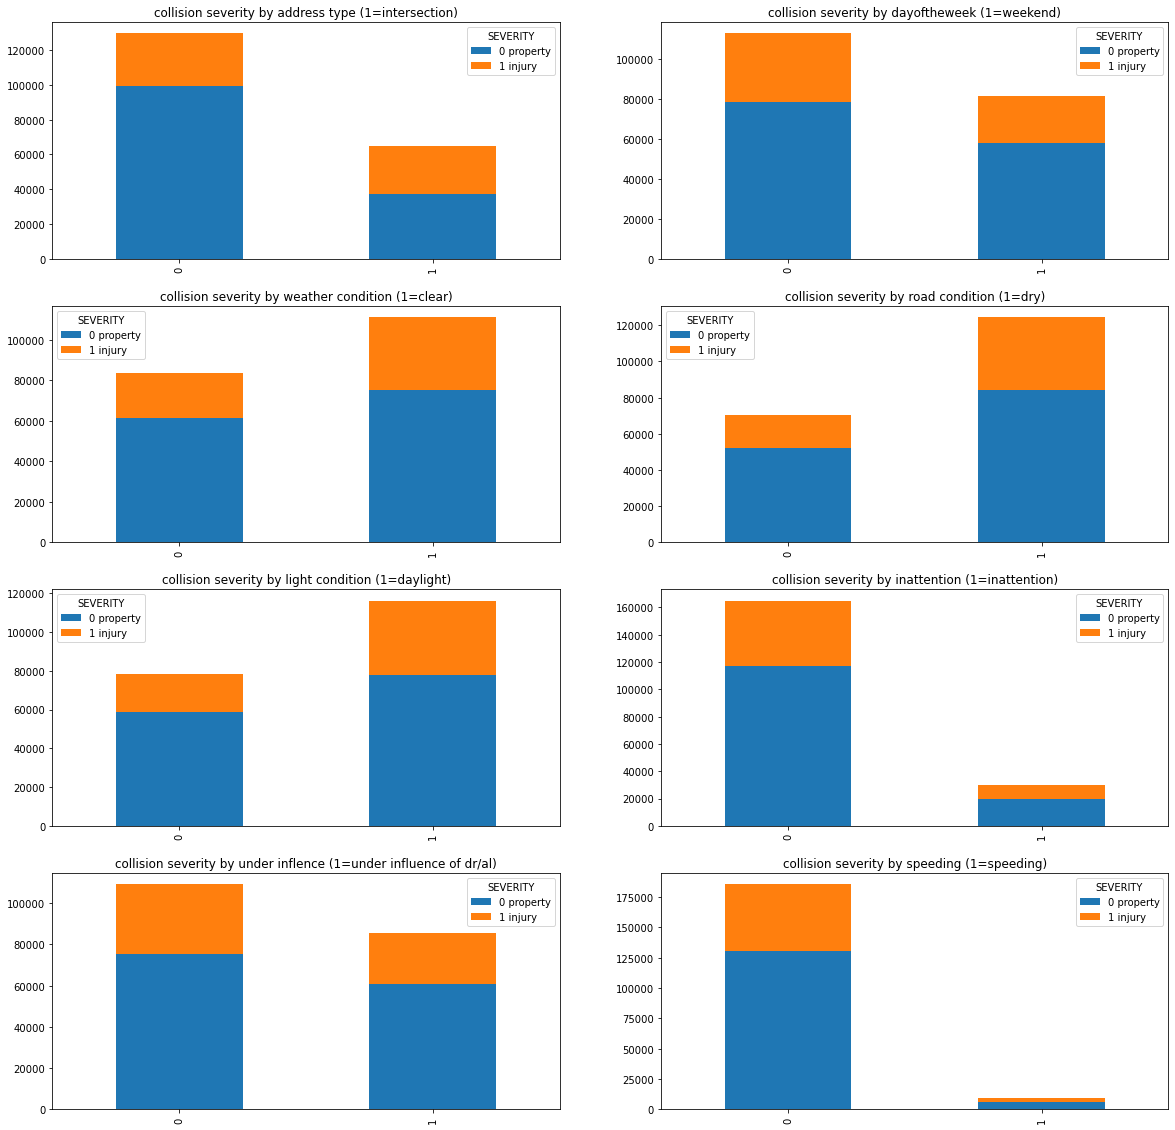

In [39]:
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)
ax8 = fig.add_subplot(4, 2, 8)

cross_SEVADD.T.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('collision severity by address type (1=intersection)')
ax1.set_xlabel('')
cross_SEVWEE.T.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('collision severity by dayoftheweek (1=weekend)')
ax2.set_xlabel('')
cross_SEVWEA.T.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('collision severity by weather condition (1=clear)')
ax3.set_xlabel('')
cross_SEVROA.T.plot(kind='bar', stacked=True, ax=ax4)
ax4.set_title('collision severity by road condition (1=dry)')
ax4.set_xlabel('')
cross_SEVLIG.T.plot(kind='bar', stacked=True, ax=ax5)
ax5.set_title('collision severity by light condition (1=daylight)')
ax5.set_xlabel('')

cross_SEVINA.T.plot(kind='bar', stacked=True, ax=ax6)
ax6.set_title('collision severity by inattention (1=inattention)')
ax6.set_xlabel('')

cross_SEVUND.T.plot(kind='bar', stacked=True, ax=ax7)
ax7.set_title('collision severity by under inflence (1=under influence of dr/al)')
ax7.set_xlabel('')

cross_SEVSPE.T.plot(kind='bar', stacked=True, ax=ax8)
ax8.set_title('collision severity by speeding (1=speeding)')
ax8.set_xlabel('')

plt.show()

##  DT Result (main)

In [40]:
from sklearn.model_selection import train_test_split

### define targat & feature matrix

In [41]:
X=df[['WEEKEND','ADDINT','WEACLE','ROADRY','LIGDAY', 'INATTE', 'UNDERI', 'SPEEDI']].values
y=df['SEVERITY']
y.replace({'1 injury':1,'0 property':0},inplace=True)

### downsampling & normalizing

In [42]:
#Downsampleing

from sklearn import preprocessing

i_class0=np.where(y==0)[0]
i_class1=np.where(y==1)[0]
n_class0=len(i_class0)
n_class1=len(i_class1)

downsample=np.random.choice(i_class0,size=n_class1,replace=False)
y_down=np.hstack((y[i_class1],y[downsample]))
X_down=np.vstack((X[i_class1,:],X[downsample,:]))

X_down_norm= preprocessing.StandardScaler().fit(X_down).transform(X_down)

In [43]:
print('sample size is adjusted for 1, size=', n_class1)
print('total sample size =', len(y_down))
X_down_norm[0:5]

sample size is adjusted for 1, size= 58188
total sample size = 116376


array([[-0.84584166,  1.28893799, -1.18629585, -1.37627521,  0.78831808,
        -0.43717277, -0.87861908, -0.2328441 ],
       [-0.84584166,  1.28893799, -1.18629585, -1.37627521,  0.78831808,
        -0.43717277,  1.13814965, -0.2328441 ],
       [-0.84584166,  1.28893799,  0.84296004,  0.72659886,  0.78831808,
        -0.43717277, -0.87861908, -0.2328441 ],
       [-0.84584166,  1.28893799,  0.84296004,  0.72659886,  0.78831808,
        -0.43717277,  1.13814965, -0.2328441 ],
       [ 1.18225437, -0.77583251,  0.84296004,  0.72659886, -1.26852349,
        -0.43717277, -0.87861908, -0.2328441 ]])

In [44]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_down_norm, y_down, test_size=0.2, random_state=1)

In [45]:
print(X_trainset.shape, y_trainset.shape)
print(X_testset.shape, y_testset.shape)

(93100, 8) (93100,)
(23276, 8) (23276,)


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
#decisiontree = DecisionTreeClassifier(random_state=0)

decisiontree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
model=decisiontree.fit(X_trainset, y_trainset)

In [48]:
y_trainhat_DT = decisiontree.predict(X_trainset)
y_testhat_DT = decisiontree.predict(X_testset)


from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy(train): ", metrics.accuracy_score(y_trainset, y_trainhat_DT))
print("DecisionTrees's Accuracy(test): ", metrics.accuracy_score(y_testset, y_testhat_DT))

DecisionTrees's Accuracy(train):  0.6149516648764769
DecisionTrees's Accuracy(test):  0.6106289740505242


### Drawing tree

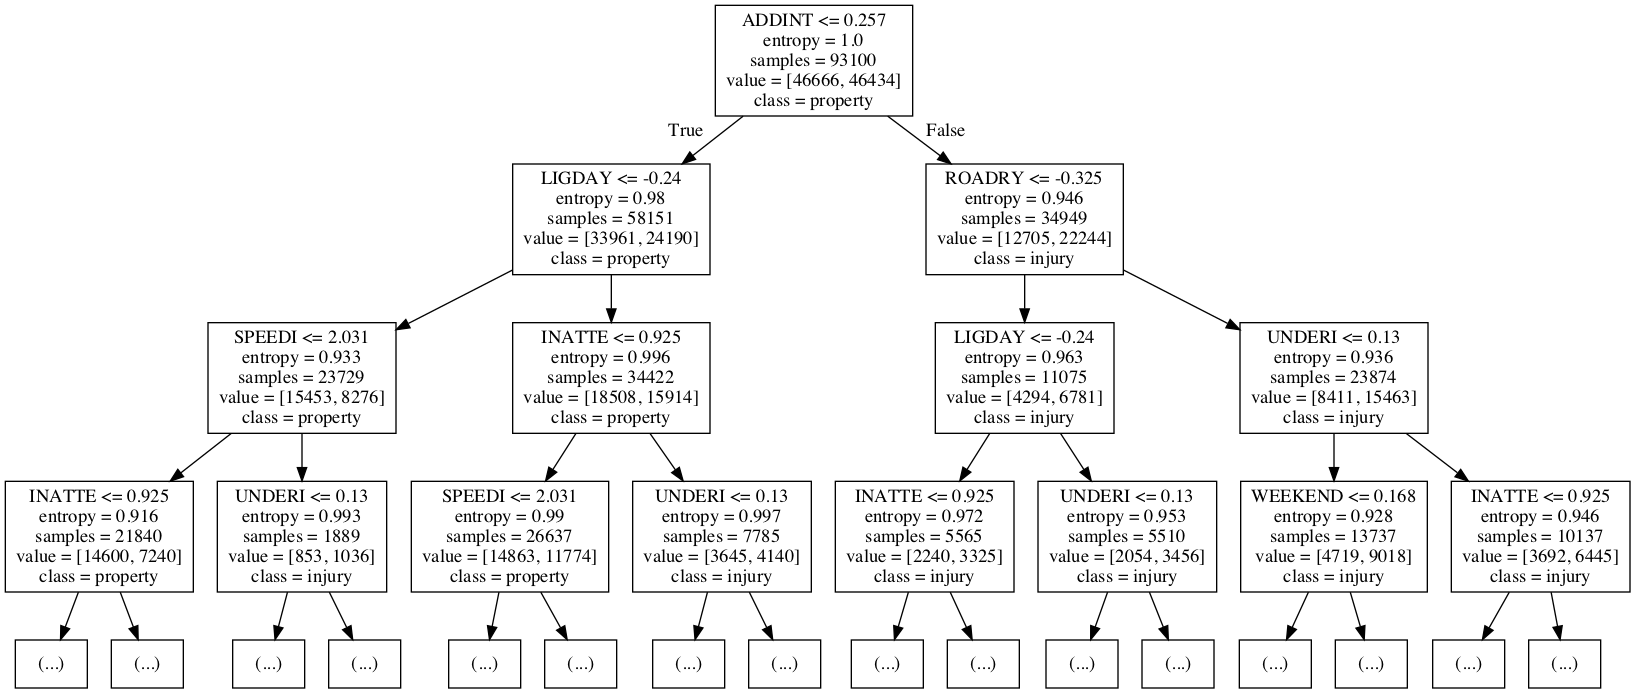

In [49]:
carfeature_names=['WEEKEND','ADDINT','WEACLE','ROADRY','LIGDAY','INATTE', 'UNDERI', 'SPEEDI']
carclass_names=['property','injury']


dot_data=tree.export_graphviz(decisiontree, out_file=None, max_depth=3,
                              feature_names=carfeature_names, class_names=carclass_names)
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## SVM, logistic regression and eval metrics

### support vector machine

In [51]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)
y_testhat_svm=clf.predict(X_testset)

### logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
y_testhat_LR = LR.predict(X_testset)

### model evaluations

In [54]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print(metrics.accuracy_score(y_testset,y_testhat_svm),
      metrics.accuracy_score(y_testset, y_testhat_LR),
      metrics.accuracy_score(y_testset, y_testhat_DT))

print(f1_score(y_testset, y_testhat_svm, average='weighted') ,
      f1_score(y_testset, y_testhat_LR , average='weighted'),
     f1_score(y_testset, y_testhat_DT, average='weighted'))

print(jaccard_score(y_testset, y_testhat_svm, average='weighted') ,
      jaccard_score(y_testset, y_testhat_LR, average='weighted') ,
      jaccard_score(y_testset, y_testhat_DT , average='weighted'))


0.6109297130091081 0.6075356590479464 0.6106289740505242
0.6109316089090383 0.6072420099648698 0.6104871421197257
0.4398139461870883 0.4360590697389157 0.43942240513514497
